# 離群值處理

#### Detect 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data_path = './data/house_train.csv'
df_train = pd.read_csv(data_path)
ori_series = df_train['土地移轉總面積(平方公尺)']
display(ori_series)
print(len(ori_series))

0         98.57
1         40.25
2        112.21
3         33.50
4          7.75
          ...  
69165     33.01
69166     50.79
69167      6.09
69168     22.63
69169    111.16
Name: 土地移轉總面積(平方公尺), Length: 69170, dtype: float64

69170


Series([], Name: 土地移轉總面積(平方公尺), dtype: float64)

0          98.57
2         112.21
6         104.64
25        156.12
38         79.42
          ...   
69134     105.00
69144     117.00
69147      77.41
69150    1587.00
69169     111.16
Name: 土地移轉總面積(平方公尺), Length: 4891, dtype: float64

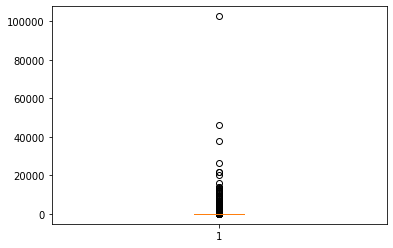

In [2]:
qt1 = ori_series.quantile(q=0.25)
qt3 = ori_series.quantile(q=0.75)
iqr = qt3-qt1


display(ori_series[ori_series<(qt1 - 1.5*iqr)])
display(ori_series[ori_series>(qt3 + 1.5*iqr)])
plt.boxplot(ori_series)
plt.show()

#### drop outliers

64279


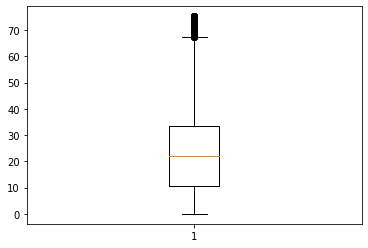

In [3]:
mask = (ori_series>(qt1 - 1.5*iqr)).tolist() and (ori_series<(qt3 + 1.5*iqr)).tolist()
series_drop_outliers = ori_series[mask]
print(len(series_drop_outliers))
plt.boxplot(series_drop_outliers)
plt.show()

#### fill outliers

69170


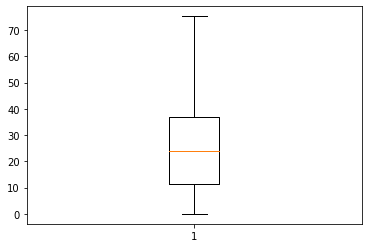

In [4]:
series_fill = ori_series.copy()
series_fill[series_fill>(qt3 + 1.5*iqr)] = qt3 + 1.5*iqr
print(len(series_fill))
plt.boxplot(series_fill)
plt.show()

# Normalize

#### MinMaxScaler

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

print(f"min of X: {X.min(axis=0)}")
print(f"max of X: {X.max(axis=0)}\n")
min_max_scaler = MinMaxScaler().fit(X)
x_minmax_sk = min_max_scaler.transform(X)
print(x_minmax_sk)

min of X: [ 0. -1. -1.]
max of X: [2. 1. 2.]

[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


#### StandardScaler

In [14]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
print(f"mean of X: {X.mean(axis=0)}")
print(f"std of X: {X.std(axis=0)}\n")

scaler = StandardScaler().fit(X)
# apply mean and std to standardize data
x_sc_sk = scaler.transform(X)
print(f"mean of scaler: {scaler.mean_}")
print(f"std of scaler: {scaler.scale_}\n")
print(x_sc_sk)

mean of X: [1.         0.         0.33333333]
std of X: [0.81649658 0.81649658 1.24721913]

mean of scaler: [1.         0.         0.33333333]
std of scaler: [0.81649658 0.81649658 1.24721913]

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


# 資料合併

#### pd.concat()

In [2]:
df1 = pd.DataFrame([['A1','B1'], ['A2','B2']],
             columns=['A', 'B'],
             index=[1,2])

df2 = pd.DataFrame([['A3','B3'], ['A4','B4']],
             columns=['A', 'B'],
             index=[1,2])

df3 = pd.DataFrame([['B5','C5'], ['B6','C6']],
             columns=['B', 'C'],
             index=[5,6])

df4 = pd.concat([df1, df2])
df5 = pd.concat([df1, df2],axis = 1)
df6 = pd.concat([df1, df3])

display(df1)
display(df2)
display(df4)
display(df5)
display(df6)

,A,B
1,A1,B1
2,A2,B2


,A,B
1,A3,B3
2,A4,B4


,A,B
1,A1,B1
2,A2,B2
1,A3,B3
2,A4,B4


,0,1,2,3
1,A1,B1,A3,B3
2,A2,B2,A4,B4


,A,B,C
1,A1,B1,NaN
2,A2,B2,NaN
5,NaN,B5,C5
6,NaN,B6,C6


#### pd.merge()

In [8]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])
df2 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D10000', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])
display(df1)
display(df2)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,B,D,F
2,B2,D2,F2
3,B3,D10000,F3
6,B6,D6,F6
7,B7,D7,F7


In [9]:
result_inner = pd.merge(df1, df2, how='inner')
result_inner_B = pd.merge(df1, df2, how='inner', on = 'B')
result_outer = pd.merge(df1, df2, how='outer')
display(result_inner)
display(result_inner_B)
display(result_outer)

,A,B,C,D,F
0,A2,B2,C2,D2,F2


,A,B,C,D_x,D_y,F
0,A2,B2,C2,D2,D2,F2
1,A3,B3,C3,D3,D10000,F3


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,F2
3,A3,B3,C3,D3,NaN
4,NaN,B3,NaN,D10000,F3
5,NaN,B6,NaN,D6,F6
6,NaN,B7,NaN,D7,F7


#### groupby()

In [20]:
df_train.groupby('鄉鎮市區').mean()

,index,土地移轉總面積(平方公尺),建物現況格局-廳,建物現況格局-房,建物現況格局-衛,建物移轉總面積(平方公尺),建築完成年月,總價(元),車位移轉總面積(平方公尺),車位總價(元),非都市土地使用編定,num_of_bus_stations_in_100m,income_avg,income_var,nearest_tarin_station_distance,lat,lng,單價(元/平方公尺)
鄉鎮市區,,,,,,,,,,,,,,,,,,
中山區,34691.726587,28.139323,1.123940,1.752739,1.204776,133.264413,848669.773730,3.331272e+07,13.394086,754885.067707,NaN,2.441493,1343.108813,267.873993,439.494204,25.059720,121.534978,218775.263593
中正區,34535.387155,24.305424,1.236007,1.949188,1.346144,123.707547,849618.577076,3.114683e+07,8.975695,451193.706474,NaN,2.583699,1496.591938,276.755040,428.211108,25.032343,121.521842,235269.493939
信義區,34305.346597,36.647533,1.327120,2.123979,1.324188,128.445261,818595.989634,3.521616e+07,6.096314,313682.957487,NaN,2.239791,1310.348145,200.286806,498.971968,25.034410,121.568757,214341.962094
內湖區,34570.978665,72.901629,1.415406,2.250682,1.419995,201.249273,886689.402107,3.398866e+07,22.588281,708740.863557,NaN,1.837013,1322.240683,158.478127,627.123296,25.072921,121.589586,166137.307492
北投區,34632.364115,96.105962,1.319805,2.070640,1.311970,126.726180,873270.228571,2.268747e+07,15.879229,592012.549191,NaN,2.172874,1163.686976,295.577519,613.050564,25.119150,121.508861,144024.315566
南港區,35055.588293,98.578533,1.431545,2.292033,1.375935,168.734410,940920.804651,3.435376e+07,20.770358,820435.771707,NaN,2.332683,1134.075688,151.688909,698.489662,25.049932,121.599572,171322.928130
士林區,34237.299590,151.770087,1.250778,2.063063,1.283866,123.417374,789688.724765,2.635080e+07,11.027135,543428.599509,NaN,2.250614,1321.852385,244.067742,1182.389213,25.092430,121.529591,168086.567568
大同區,34674.319619,26.159728,1.241074,1.982659,1.262156,118.639337,833820.786974,2.081069e+07,6.638242,233976.878613,NaN,2.577800,1043.757411,201.499472,435.676032,25.059948,121.516647,182928.137708
大安區,34796.002388,26.706339,1.401146,2.254696,1.432665,121.689139,802945.807204,3.316831e+07,5.720533,293435.789080,NaN,2.041229,1707.756839,303.870320,353.807524,25.032097,121.544807,253420.934416


# 補充:

In [22]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])
df_melt = df1.melt()
display(df_melt)

,variable,value
0,A,A0
1,A,A1
2,A,A2
3,A,A3
4,B,B0
5,B,B1
6,B,B2
7,B,B3
8,C,C0
9,C,C1


In [27]:
df_pivot=df_melt.set_index(pd.Index([0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]))
df_pivot=df_pivot.pivot(columns='variable')
display(df_pivot)

value            
variable     A   B   C   D
0           A0  B0  C0  D0
1           A1  B1  C1  D1
2           A2  B2  C2  D2
3           A3  B3  C3  D3